In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats


# To print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display data to three deciaml places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To print all columns
pd.set_option('max_columns', None)

## load datasets

In [45]:
kbo2021_df = pd.read_csv("../data/kbo2021.csv", encoding="CP949")
kbo2020_df = pd.read_csv("../data/kbo2020.csv", encoding="CP949")

kbo2021_df.head(3)
kbo2020_df.head(3)

,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.100
1,2,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.060
2,3,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.970


,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,로하스,KT,142,628,550,192,47,116,135,65,132,0,0.383,0.349,0.417,0.680,1.097,0.457,8.760
1,2,양의지,NC,130,528,461,151,33,86,124,46,47,5,0.305,0.328,0.400,0.603,1.003,0.423,6.920
2,3,김하성,Hero,138,622,533,163,30,111,109,75,68,23,0.304,0.306,0.397,0.523,0.920,0.401,6.810


In [46]:
# WAR 2020과 WAR 2021을 비교하기 위해, kbo2020_df에 WAR 2021 column을 추가해야 함.
kbo2021_df = kbo2021_df[['선수명', 'WAR']]

baseball_df = pd.merge(kbo2020_df, kbo2021_df, on='선수명', how='left')
# baseball_df.head() # WAR_x, WAR_y 확인

# Column명 변경
baseball_df.rename(columns = {'WAR_x' : 'WAR(2020)', 'WAR_y' : 'WAR(2021)'}, inplace=True)

In [47]:
# baseball_df = pd.read_csv("../data/baseball.csv", encoding="CP949")


baseball_df = baseball_df.drop(['#'], axis=1)
# baseball_DF.head(5)

baseball_df_columns = [['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

# WAR에서 NaN 값 가진 선수 제거
baseball_df = baseball_df.dropna()
baseball_df.info()


# BABIP object형 int로 전환
# baseball_DF["BABIP"] = pd.to_numeric(baseball_DF["BABIP"])
# baseball_DF["BABIP"].astype('float32
# 그냥 우선 BABIP 컬럼 제거하자. 전환하는 방법은 나중에 생각해보기
baseball_df = baseball_df.drop(['BABIP'], axis=1)

baseball_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1 to 310
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   선수명        246 non-null    object 
 1   팀명         246 non-null    object 
 2   경기         246 non-null    int64  
 3   타석         246 non-null    int64  
 4   타수         246 non-null    int64  
 5   안타         246 non-null    int64  
 6   홈런         246 non-null    int64  
 7   득점         246 non-null    int64  
 8   타점         246 non-null    int64  
 9   볼넷         246 non-null    int64  
 10  삼진         246 non-null    int64  
 11  도루         246 non-null    int64  
 12  BABIP      246 non-null    object 
 13  타율         246 non-null    float64
 14  출루율        246 non-null    float64
 15  장타율        246 non-null    float64
 16  OPS        246 non-null    float64
 17  Woba       246 non-null    float64
 18  WAR(2020)  246 non-null    float64
 19  WAR(2021)  246 non-null    float64
dtypes: float64

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,타율,출루율,장타율,OPS,Woba,WAR(2020),WAR(2021)
1,양의지,NC,130,528,461,151,33,86,124,46,47,5,0.328,0.400,0.603,1.003,0.423,6.920,6.480
3,최형우,KIA,140,600,522,185,28,93,115,70,101,0,0.354,0.433,0.590,1.023,0.441,6.740,0.190
4,터커,KIA,142,631,542,166,32,100,113,76,67,0,0.306,0.398,0.557,0.955,0.412,6.100,0.300
5,나성범,NC,130,583,525,170,34,115,112,48,148,3,0.324,0.389,0.596,0.985,0.421,5.640,3.190
6,최정,SK,133,553,452,122,33,90,96,75,98,8,0.270,0.392,0.538,0.930,0.403,5.570,6.830


In [48]:
# 한번에 15개를 보려니 화면이 깨져서, 아래에서 8개/7개로 나눔
# fig, axs = plt.subplots(figsize = (16, 30), ncols = 2, nrows = 8)
# lm_features = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷','삼진', '도루', 
#                '타율', '출루율', '장타율', 'OPS', 'Woba'] # 15개
# colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ,
#          'g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ,
#          'g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ]
# for i , feature in enumerate(lm_features):
#     row = int(i / 2)
#     col = i % 2
#     # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
#     sns.regplot(x=feature , y='WAR',data=baseball_df , ax=axs[row][col], color=colors[i])

# sns.regplot(x = '볼넷', y = 'WAR', data=baseball_df)

### WAR(2021) 분포 확인

<AxesSubplot:>

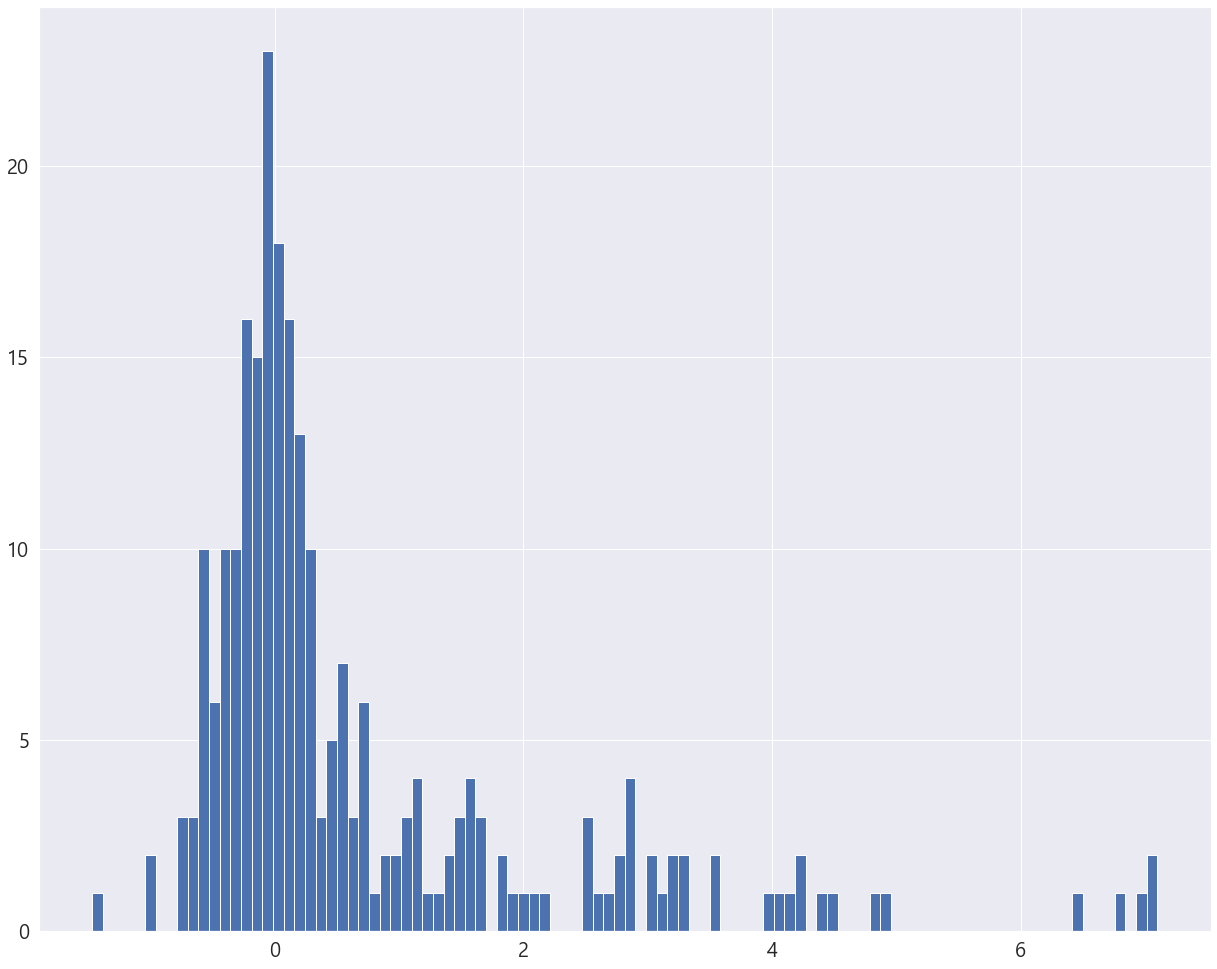

In [66]:
# WAR(2021) 분포 확인
# 0 근처의 WAR 값을 가진 분포가 대다수이다. 

baseball_df['WAR(2021)'].hist(bins=100, xlabelsize = 20, ylabelsize = 20)

## 회귀 분석에 사용할 컬럼 확인

In [50]:
baseball_df_columns = baseball_df[[ '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

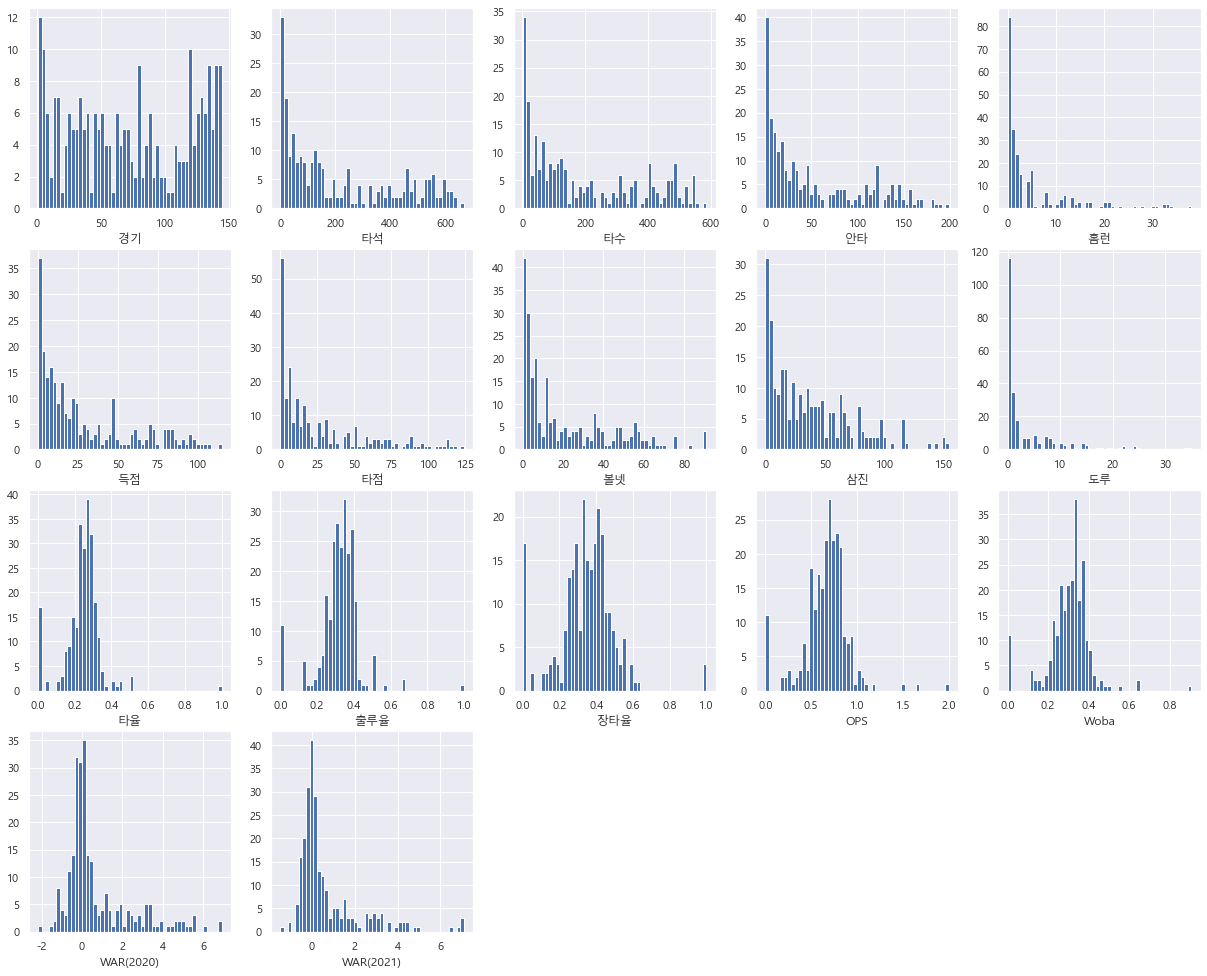

In [51]:
def plot_hist_column(df):
    plt.rcParams['figure.figsize'] = [21, 17]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i], y = -0.2) # title 위치를 하단으로 설정하기 위해 y값 추가
    plt.show()
    
plot_hist_column(baseball_df_columns)  

## 각 컬럼별로 WAR 수치에 미치는 영향도 조사

<AxesSubplot:xlabel='경기', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타석', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타수', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='안타', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='홈런', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='득점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='볼넷', ylabel='WAR(2021)'>

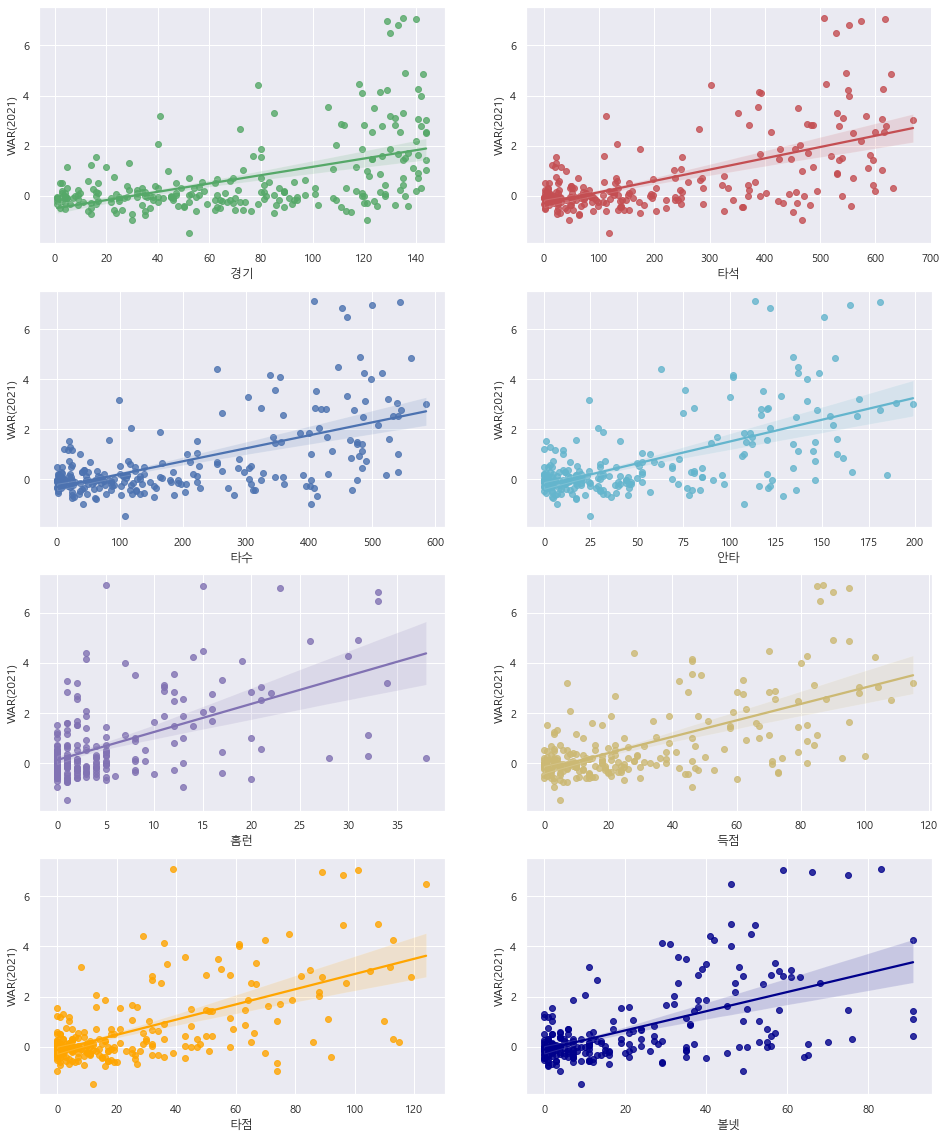

In [52]:
# seaborn에서 한글 깨짐 수정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷'] # 8개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

<AxesSubplot:xlabel='삼진', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='도루', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='출루율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='장타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='OPS', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='Woba', ylabel='WAR(2021)'>

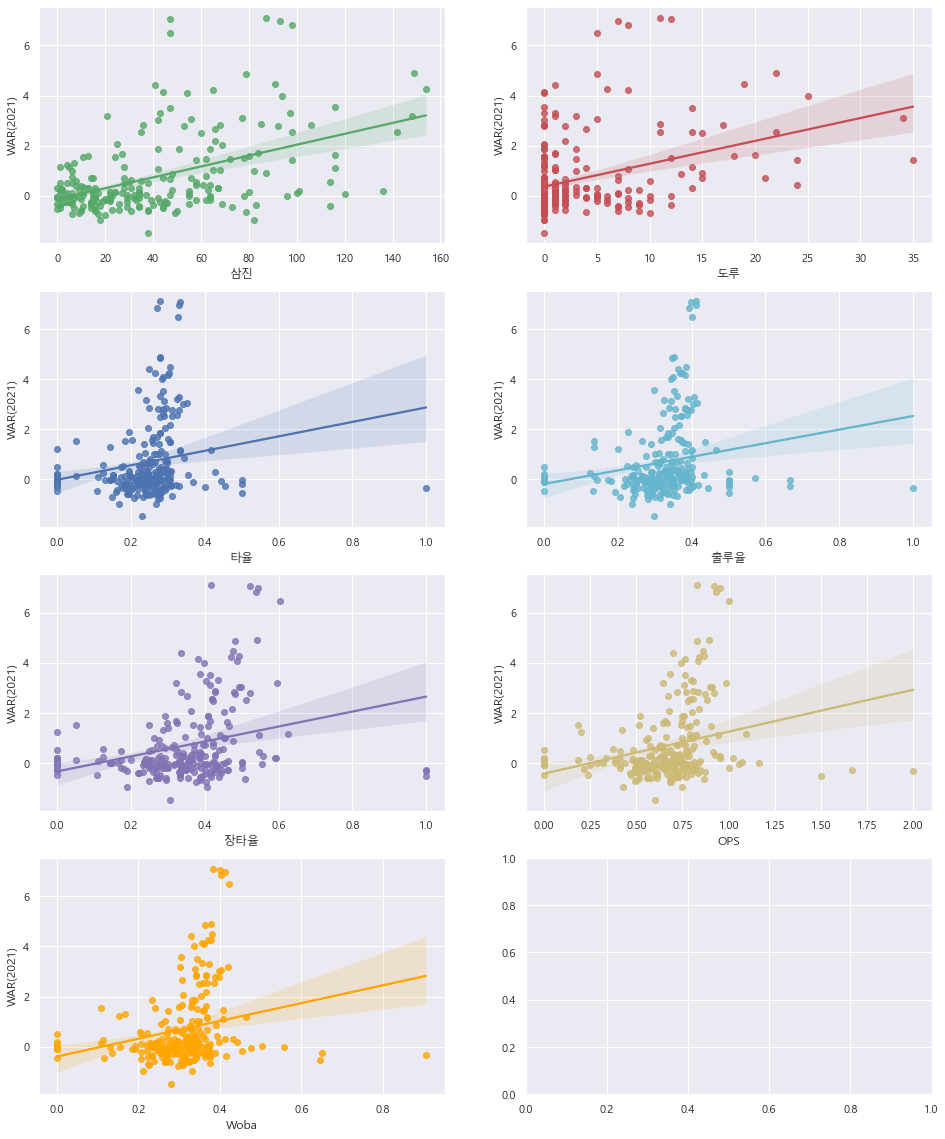

In [53]:
fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['삼진', '도루', '타율', '출루율', '장타율', 'OPS', 'Woba'] # 7개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

## Feature Scaling 
* 서로 다른 변수(컬럼)의 값 범위를 일정한 수준으로 맞춰 준다. 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, r2_score)